<a href="https://colab.research.google.com/github/ulises1229/ComputacionII-2021-2/blob/main/code/Comp_II_Unidad_3_Interpolaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computación II 
## Unidad III - Interpolaciones
+ Autor: Ulises Olivares 
+ uolivares@unam.mx
+ Mar 12, 2021

<table align="center">

<td align="center"><a target="_blank" href="https://colab.research.google.com/drive/1eN3cW0h1XBXX3_Bn4DhbLdq8EjhJAn0d?usp=sharing">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Ejecutar en Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ulises1229/ComputacionII-2021-2/blob/main/code/Comp_II_Unidad_3_Interpolaci%C3%B3n.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />Ver código fuente en GitHub</a></td>


</table>

# 1. Interpolaciones usando el método de las diferencias divididas de Newton.

Es posible implementar este método a través de una definición recursiva o iterativa 

Dado:

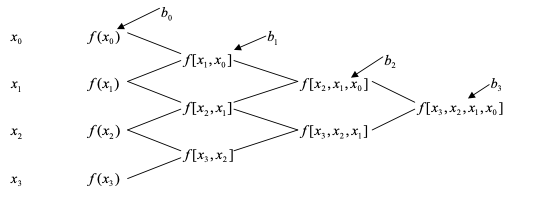

Se puede generalizar para calcular la interpolación de n+1 puntos.

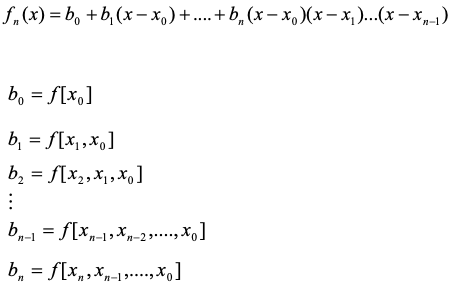


In [ ]:
import matplotlib.pyplot as plt
from sympy.abc import x
import numpy as np

class Interpolation():

    # Generar una interpolación lineal
    def linearInterpolation(self, X, Y):
        # b0 = intecepto, b1 = pendiente
        b0 = Y[0]
        b1 = (Y[1] - Y[0]) / (abs(X[1]) - abs(X[0]))
        #print("b1", b1)
        return b0 + b1*(x - X[0])

    # 
    def tmpLinearInterpolation(self, X, Y):
        # b0 = intecepto, b1 = pendiente
        b0 = Y[0]
        b1 = (Y[1] - Y[0]) / (abs(X[1]) - abs(X[0]))

        return b0, b1

    def cuadraticInterpolation(self, X, Y):
        if (len(X) == 3 and len(Y) == 3):   
            b0, b1 = self.tmpLinearInterpolation(X, Y)
            b2 = (((Y[2] - Y[1]) / (X[2] - X[1])) - b1 ) / (X[2]-X[0])
            return b0 + b1*(x-X[0]) + b2*(x -X[0]) *(x-X[1])
        


class Graph():
    # Genera un gráfico de dispersión
    def plotScatter(self, X, Y, lab):
        plt.scatter(X, Y, label = lab)
        plt.title("Diagrama de dispersión Variable Independiente Vs Dependiente")
        plt.xlabel("X")
        plt.ylabel("Y")
    # Genera un gráfico de línea

    def plotLine(self, func,a ,b, leg):
        X = np.linspace(a, b, 100)
        Y = np.zeros_like(X)

        for i in range(len(X)):
            Y[i] = func.subs(x, X[i])
        
        plt.plot(X,Y,  c = 'g', ls='--')
        plt.legend(loc='best')
    # Despliega el gráfico (útil para ) 
    def displayPlot(self):
        plt.show()


def main():
    X = [1, 4, 8, 16, 32, 64, 128, 256, 300]
    Y = [2, 8, 16, 32, 64, 128, 256, 1024, 512]

    objG = Graph()
    objG.plotScatter(X,Y, "Datos originales")

    objInt = Interpolation()

    funcList = list()

    for i in range(len(X) - 1):
        #print(X[i:i+2])
        funcList.append(objInt.linearInterpolation(X[i:i+2], Y[i:i+2]))
    
    print(funcList)

    lastFunc = funcList[-2]

    # Predecir una valor cuando x = 200
    x1 = 200
    y1 = lastFunc.subs(x, x1) 

    print("Valor X:", x1, " Valor estimado en y:", y1)
    objG.plotScatter(x1, y1, "Valor estimado")

    
    for i in range(len(X)-1):
        objG.plotLine(funcList[i], X[i], X[i+1], "Interpolación lineal")

    # Calcular interpolación cuadrática

    funcList = list()  
    for i in range(len(X) - 2):
        #print(X[i:i+2])
        funcList.append(objInt.cuadraticInterpolation(X[i:i+3], Y[i:i+3]))

    for i in range(len(X)-2):
        objG.plotLine(funcList[i], X[i], X[i+2], "Interpolación cuadrática")
    
    """linearInt = objInt.linearInterpolation(X,Y)
    print("Interpolación lineal:",linearInt)"""

    #objG.plotLine(linearInt, 1, 4)

if __name__ == "__main__":
    main()

# 2. Repaso Pandas

+ Lectura de dataframes 



In [ ]:
# importar la librería de pandas como pd
import pandas as pd

#Leer el dataframe salaries.csv
df = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IA-2021-II/main/data/salaries.csv")
print(df)

In [ ]:
# Revisar los primeros registros del df
df.head(10)


In [ ]:
# Revisar los últimos registros del df? 
df.tail()

In [ ]:
# Comprobar el tipo de datos de la columna salary 
df['rank'].dtype
#df.discipline
df.dtypes
#print(df['salary'])

#### Atributos de dataframes

In [ ]:
# Comprobar el tipo de datos de todas las columnas
df.dtypes

In [ ]:
# Listar los nombres de las columnas
df.columns

In [ ]:
# Listar etiquetas de fila y nombres de columna
df.axes

In [ ]:
# Listar el número de dimensiones
df.ndim

In [ ]:
# Listar el número de  elementos totales
df.size

In [ ]:
# Devuelve una tupla con las dimensiones
df.shape

In [ ]:
# Representación en numpy de los datos
lista = df.values

prom = 0
for i in lista:
  prom += i[5]
prom = prom/len(lista)
print("Promedio: " + str(prom))

In [ ]:
df.iloc[0:50]

#### Métodos para dataframes

In [ ]:
# Descibir con estadística descriptiva las columnas numéricas
df.describe()

In [ ]:
# Calcular STD de todas las columnas numéricas
print("Std: \n",df.std())
print("Promedio: \n", df.mean())

In [ ]:
# Calcular STD para columna phd
df['phd'].std()
# Calcular STD para columna salario
df['salary'].std()

In [ ]:
# Calcular medias de los primeros 50 registros
df.head(62).mean()

In [ ]:
# Calcular STD de salario
df.salary.std()

In [ ]:
# Calcular promedio de los últimos 5 registros de salario
df.salary.tail(5).mean()

In [ ]:
# Calcular estadísticos descriptivos de salario
df.salary.describe()

In [ ]:
# Promedio de los primeros 30 elementos de la columna salario 
mean1 = df.salary.head(30).mean()
mean2 = df.salary.tail(30).mean()

mean = (mean1 + mean2) / 2

std1 = df.salary.std()

resultado = mean + std1

print("Resultado: " + str(resultado))



In [ ]:
df_rank = df.groupby(['rank'])
df_rank.head()
df_rank['salary'].mean()
print(df_rank)

In [ ]:
tmpDf = df.groupby('rank')[['salary']].mean()
tmpDf.head()
#print(tmpDf)

Filtrado de datos

In [ ]:
df.head(78)

In [ ]:
df_filter = (df[(df.salary < 60000) ])
print("Mean: ", df_filter.salary.mean())
print("Descriptive statitistics: ", df_filter.salary.describe())
print(len(df_filter))
df_filter.head(len(df_filter))

In [ ]:
# Obtener solo dos columnas (variables)
df[['service','salary']]

service = list(df.service)
salary = list(df.salary)

print("Service:", service, "len", len(service))
print("Salary:", salary, "len", len(salary))

objG = Graph()
objG.plotScatter(service, salary)

objInt = Interpolation()

funcList = list()
for i in range(int(len(service)/10)):
        #print(X[i:i+2])
        print(service[i:i+2])
        print(salary[i:i+2])
        linInter = objInt.linearInterpolation(service[i:i+2], salary[i:i+2])
        print(linInter)
        funcList.append(linInter)
    
    #print(funcList)

    
for i in range(int(len(service)/10)):
    objG.plotLine(funcList[i], service[i], service[i+1])



In [ ]:
# Filtrar solo por filas

df[10:20][['rank', 'salary']]

In [ ]:
# Ordenar data frame por servicio
descDF = df.sort_values(by = 'salary', ascending= False)
descDF.head(10)


#### Instalar paquete faltante datapackage
datahub.io

```
# This is formatted as code
```



In [ ]:
!pip install datapackage

#### Importar datos desde datahub

In [ ]:
import datapackage

import pandas as pd

data_url = 'https://datahub.io/core/co2-ppm/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

## 3. Interpolación de Lagrange

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy.abc import x

class Graph():

    # Genera un gráfico de dispersión
    def plotScatter(self, X, Y, legend):
        plt.scatter(X, Y, label = legend)
        plt.title("Diagrama de dispersión Variable Independiente Vs Dependiente")
        plt.xlabel("X")
        plt.ylabel("Y")
    
    # Genera un gráfico de línea
    def plotLine(self, func,a ,b, legend):
        X = np.linspace(a, b, 100)
        Y = np.zeros_like(X)

        for i in range(len(X)):
            Y[i] = func.subs(x, X[i], label = legend)
        
        plt.plot(X, Y,  )
        plt.legend(loc='best')
    
    # Despliega el gráfico (útil para ) 
    def displayPlot(self):
        plt.show()

class LagrangeInterpolation:

    def interpolation(self, X, Y, degree):
        # interpolation
        interpolation = 0
        for i range(degree):
            tmpFunction = 1
            for j range(degree):
                if (i != j):
                    #tmpFunction *= 
            tmpFunction *= Y[i]
        #interpolation += 
    return interpolation

def main():
    # Datos de entrada
    X = [1.5, 2.7, 5.6, 7.2]
    Y = [-5, 2, -2, 10]

    # Grado de pilinimo
    degree = len(X)

    # Generación de objetos
    objG = Graph()

    objG.plotScatter(X, Y, "Puntos originales")






if __name__ == "__main__":
    main()

# 4. Interpolación Spline

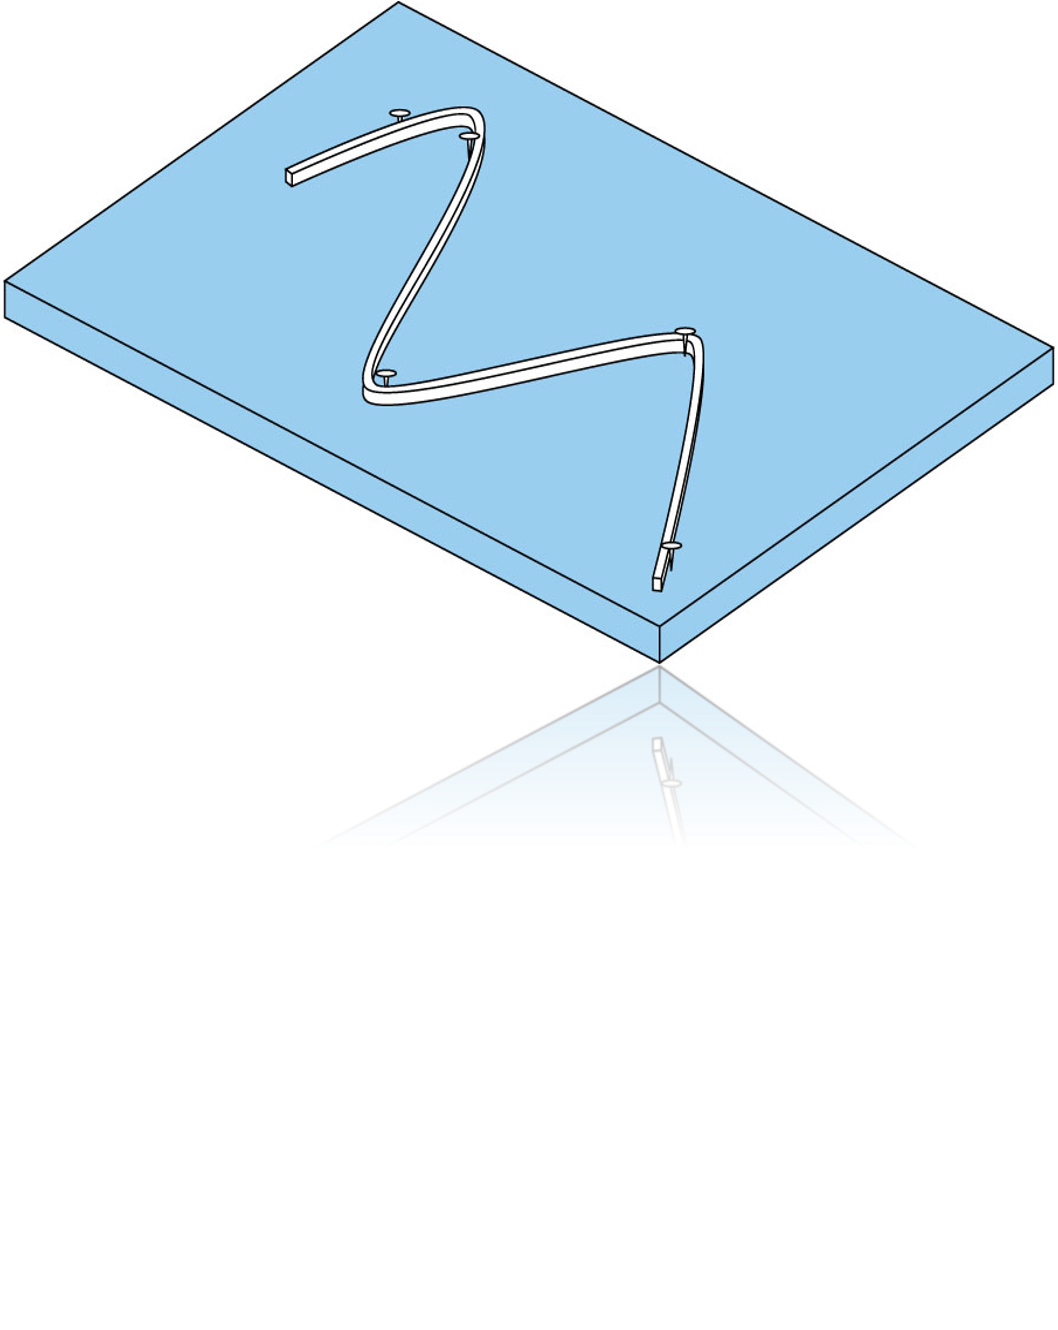







> TODO: Evaluar si els siguiente conjunto de funciones son diferenciables.

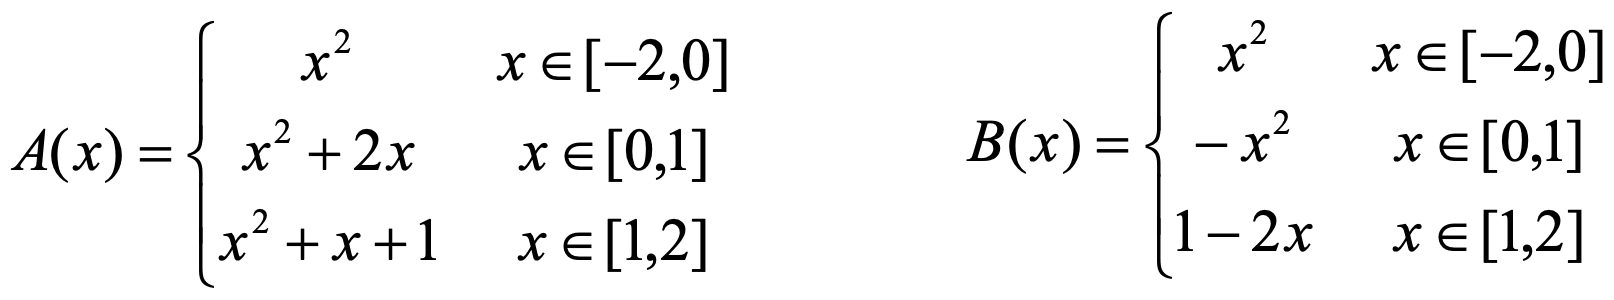



In [ ]:
from sympy import *
from sympy.abc import x
import numpy
import matplotlib.pyplot as plt
import numpy as np

class Graph():

    # Genera un gráfico de dispersión
    def plotScatter(self, X, Y, legend):
        plt.scatter(X, Y, label = legend)
        plt.title("Diagrama de dispersión Variable Independiente Vs Dependiente")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend(loc='best')
        
    
    # Genera un gráfico de línea
    def plotLine(self, func,a ,b, legend):
        X = np.linspace(a, b, 100)
        Y = np.zeros_like(X)

        for i in range(len(X)):
            Y[i] = func.subs(x, X[i], label = legend)
        
        plt.plot(X, Y,  )
        plt.legend(loc='best')
    
    # Despliega el gráfico (útil para ) 
    def displayPlot(self):
        plt.show()

class SplineInterpolation():

    def verifyContinuity(self, fun1, fun2, fun3):
        # Calcular primer derivada de cada función
        der1 = fun1.diff()
        der2 = fun2.diff()
        der3 = fun3.diff()

        # Graficar funciones sobre un intervalo
        objG = Graph()
        objG.plotLine(fun1, -2, 0, "1st")
        objG.plotLine(fun2, 0, 1, "2nd")
        objG.plotLine(fun3, 1, 2, "3rd")
        objG.displayPlot()

        # Graficar primeras derivadas
        objG.plotLine(der1, -2, 0, "1st der")
        objG.plotLine(der2, 0, 1, "1st der")
        objG.plotLine(der3, 1, 2, "1st der")
        objG.displayPlot()

        objG.displayPlot()




def main():
    # Object to spline class
    spline = SplineInterpolation()
    objG = Graph()
    
    # *********************************************************
    # Ejercicio 1 verificar continuidad de funciones y derivadas
    # Primer conjunto de funciones
    """fun1 = x**2
    fun2 = x**2 + 2*x
    fun3 = x**2 + x +1
    
    spline.verifyContinuity(fun1, fun2, fun3)

    # Segundo conjunto de funciones
    f1 = x**2
    f2 = -x**2
    f3 = 1-2*x
    spline.verifyContinuity(f1, f2, f3)"""
    #***********************************************************
    # Termina Ejercicio 1

    X = [3, 4.5, 7, 9]
    Y = [2.5, 1, 2.5, 0.5]

    #Graficar Puntos originales
    objG.plotScatter(X, Y, "Puntos originales")
    objG.displayPlot()

    #Definir vector de nodos y resultados
    knots = list()
    results = list()

    # Generación de vector de knots
    for i in range(len(X)):
        if (i == 0 or i == (len(X)-1)):
            knots.append(X[i])
            results.append(Y[i])
        else: 
            knots.append(X[i]) #TODO: verificar inserción doble
            knots.append(X[i])
            results.append(Y[i])
            results.append(Y[i])
    print("Knots vector...")
    print(knots)
    print("Results vector ...")
    print(results)

    # Definición de listas para variables simbólicas
    A = []
    B = []
    C = []

    #Producir variables simbólicas
    for i in range(len(X)-1):
        A.append(symbols('a' +str(i+1)))
        B.append(symbols('b' +str(i+1)))
        C.append(symbols('c' +str(i+1)))
    print("Variables simbólicas")
    print(A)
    print(B)
    print(C)

    # Generación de 3*n ecuaciones
    n = len(X)-1
    
    # Matriz para almacenar sistema de ecuaciones 3*n x 3*n+1  
    eqs = np.zeros(shape=(3*n,(3*n)+1))

    coefIndex = 0

    # Producir primeras 2*n ecuaciones 
    for i in range(len(knots)):
        if (i == 0 or i == len(knots)):
            # Equations value
            eqs[i][coefIndex] =  knots[i]**2
            eqs[i][coefIndex+1] =  knots[i]
            eqs[i][coefIndex+2] = 1
            #result
            eqs[i][-1] = knots[i]
        else:
            eqs[i][coefIndex] =  knots[i]**2
            eqs[i][coefIndex+1] =  knots[i]
            eqs[i][coefIndex+2] = 1
            #result
            eqs[i][-1] = knots[i]
            # modify index
            coefIndex += 1
    print(eqs)   

if __name__ == "__main__":
    main()